In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/A1-1'
#sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
name_anndata = "anndataNucA11"
sample = "A1-1"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata) # get original anndata after Sparrow

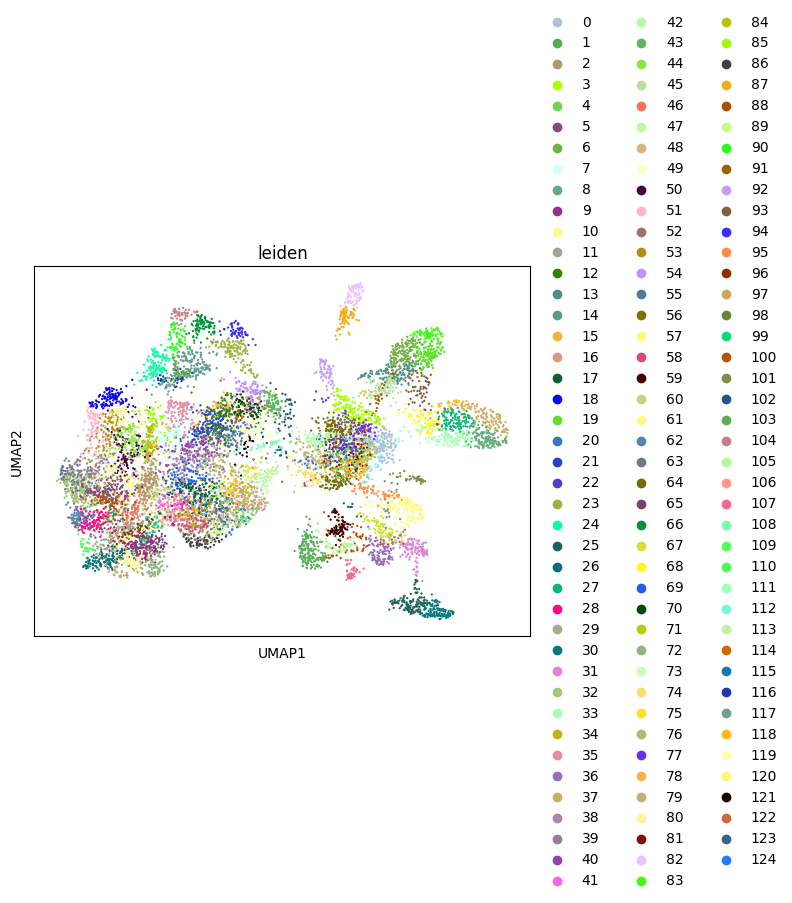

In [3]:
# Make UMAP
n_pca = np.count_nonzero(anndata.uns['pca']['variance_ratio'] > 0.01)
make_umap(anndata,n_PCAs=n_pca,n_neighbors=15)
# Leiden Overclustering
sc.tl.leiden(anndata,resolution=10,key_added='leiden')
sc.pl.umap(anndata,color='leiden',palette=list(matplotlib.colors.XKCD_COLORS.values()))

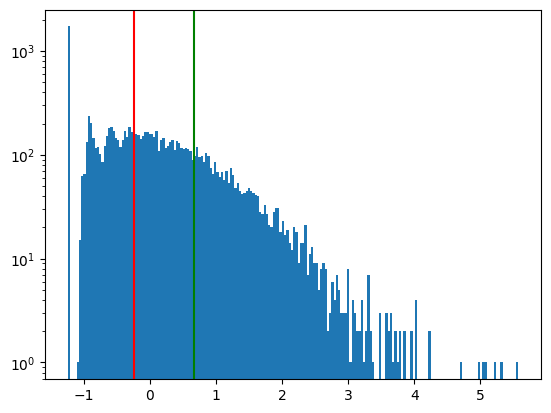

In [4]:
# Ghr is a clear 'Hepa' marker, 55% is the min of 'Hepa' we expect
# get index of 'Ghr' in anndata.var_names
index_Ghr = np.where(anndata.var_names == 'Ghr')[0][0]
# get the row of the Ghr gene in the anndata.X matrix
expressions = anndata.X[:, index_Ghr]
plot = plt.hist(expressions, bins=200, log=True)
# indicate top 55% of Ghr expression in the histogram
threshold = np.quantile(expressions, 0.45)
plt.axvline(x=threshold, color='r')
# indicate top 77,5% of Ghr expression in the histogram
threshold = np.quantile(expressions, 0.775)
plt.axvline(x=threshold, color='g')

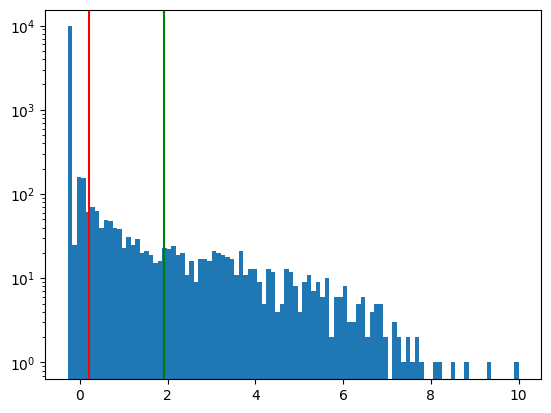

In [5]:
# Cd5l is a clear 'Kupffer' marker
# get index of 'Cd5l' in anndata.var_names
index_Cd5l = np.where(anndata.var_names == 'Cd5l')[0][0]
# get the row of the Cd5l gene in the anndata.X matrix
expressions = anndata.X[:, index_Cd5l]
# plot histogram
plot = plt.hist(expressions, bins=100, log=True)
# indicate top 8% of Cd5l expression in the histogram
threshold = np.quantile(expressions, 0.9)
plt.axvline(x=threshold, color='r')
# indicate top 4% of Cd5l expression in the histogram
threshold = np.quantile(expressions, 0.95)
plt.axvline(x=threshold, color='g')

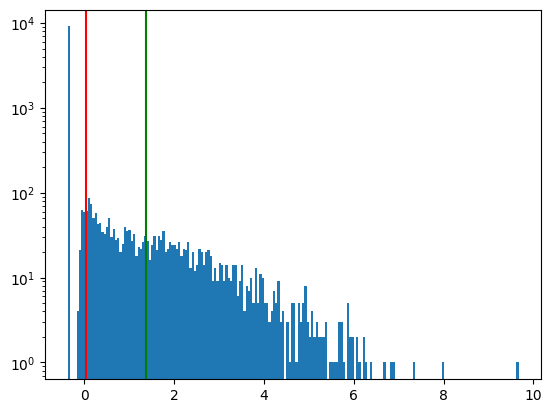

In [6]:
# Flt4 is a clear 'Endo' marker
# get index of 'Flt4' in anndata.var_names
index_Flt4 = np.where(anndata.var_names == 'Flt4')[0][0]
# get the row of the Flt4 gene in the anndata.X matrix
expressions = anndata.X[:, index_Flt4]
# plot histogram
plot = plt.hist(expressions, bins=200, log=True)
# indicate top 18% of Flt4 expression in the histogram
threshold = np.quantile(expressions, 0.82)
plt.axvline(x=threshold, color='r')
# indicate top 9% of Flt4 expression in the histogram
threshold = np.quantile(expressions, 0.91)
plt.axvline(x=threshold, color='g')

Hepa            67.145263
LSEC            11.220420
Stel             5.672250
Kupf             5.379775
Chol             2.658867
Portal vein      2.641142
B cell           1.515554
Fibr             1.471240
Oth im           1.223079
Portal LAM       0.638128
Central vein     0.345653
Meso             0.088629
Name: annotation_score_genes_original_BasicMartin_12, dtype: float64


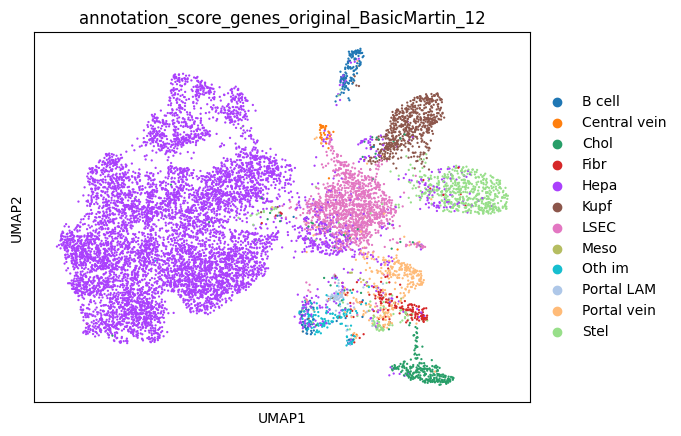

In [7]:
path_mg_BasicMartin = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/BasicMartin.csv"
mg_dict, scoresper_cluster = score_genes_bins(anndata,path_marker_genes = path_mg_BasicMartin,bins = 60,suffix ='_BasicMartin_12')